In [6]:
import torch, torchvision
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

In [7]:
device = torch.device('cpu')

In [8]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36')]
urllib.request.install_opener(opener)

In [9]:
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                        train=True,
                                        download=True,
                                        transform=transforms.ToTensor())

/home/thori/.local/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [10]:
validation_dataset = torchvision.datasets.MNIST(root='./data', 
                                        train=False,
                                        download=True,
                                        transform=transforms.ToTensor())

In [11]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=batch_size, shuffle=False)

In [12]:
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 50)
        self.fc2 = nn.Linear(50, 10)
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

model = Net().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [13]:
def train(epoch, log_interval=200):
    # Set model to training mode
    model.train()
    
    # Loop over each batch from the training set
    for batch_idx, (data, target) in enumerate(train_loader):

        # Zero gradient buffers
        optimizer.zero_grad() 
        
        # Pass data through the network
        output = model(data)

        # Calculate loss
        loss = criterion(output, target)
        print(loss)

        # Backpropagate
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))
            
def validate(loss_vector, accuracy_vector):
    model.eval()
    val_loss, correct = 0, 0
    for data, target in validation_loader:
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        val_loss += criterion(output, target).data.item()
        pred = output.data.max(1)[1]
        correct += pred.eq(target.data).cpu().sum()
    
    val_loss /= len(validation_loader)
    loss_vector.append(val_loss)
    
    accuracy = 100. * correct.to(torch.float32) / len(validation_loader.dataset)
    accuracy_vector.append(accuracy)
    
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(validation_loader.dataset), accuracy))

In [14]:
epochs = 10

lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)

tensor(2.3001, grad_fn=<NllLossBackward>)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.300054
tensor(2.2780, grad_fn=<NllLossBackward>)
tensor(2.2648, grad_fn=<NllLossBackward>)
tensor(2.2341, grad_fn=<NllLossBackward>)
tensor(2.2223, grad_fn=<NllLossBackward>)
tensor(2.1919, grad_fn=<NllLossBackward>)
tensor(2.1669, grad_fn=<NllLossBackward>)
tensor(2.1576, grad_fn=<NllLossBackward>)
tensor(2.1177, grad_fn=<NllLossBackward>)
tensor(2.1134, grad_fn=<NllLossBackward>)
tensor(2.1054, grad_fn=<NllLossBackward>)
tensor(2.0970, grad_fn=<NllLossBackward>)
tensor(2.0433, grad_fn=<NllLossBackward>)
tensor(2.0407, grad_fn=<NllLossBackward>)
tensor(1.9570, grad_fn=<NllLossBackward>)
tensor(1.9956, grad_fn=<NllLossBackward>)
tensor(1.9437, grad_fn=<NllLossBackward>)
tensor(1.8181, grad_fn=<NllLossBackward>)
tensor(1.8809, grad_fn=<NllLossBackward>)
tensor(1.9052, grad_fn=<NllLossBackward>)
tensor(1.9639, grad_fn=<NllLossBackward>)
tensor(1.8860, grad_fn=<NllLossBackward>)
tensor(1.7594, grad_fn=<NllLoss

tensor(0.4234, grad_fn=<NllLossBackward>)
tensor(0.3804, grad_fn=<NllLossBackward>)
tensor(0.4378, grad_fn=<NllLossBackward>)
tensor(0.8063, grad_fn=<NllLossBackward>)
tensor(0.3087, grad_fn=<NllLossBackward>)
tensor(0.4757, grad_fn=<NllLossBackward>)
tensor(0.4687, grad_fn=<NllLossBackward>)
tensor(0.3719, grad_fn=<NllLossBackward>)
tensor(0.8109, grad_fn=<NllLossBackward>)
tensor(0.4238, grad_fn=<NllLossBackward>)
tensor(0.6696, grad_fn=<NllLossBackward>)
tensor(0.3319, grad_fn=<NllLossBackward>)
tensor(0.3592, grad_fn=<NllLossBackward>)
tensor(0.6552, grad_fn=<NllLossBackward>)
tensor(0.4926, grad_fn=<NllLossBackward>)
tensor(0.3504, grad_fn=<NllLossBackward>)
tensor(0.2610, grad_fn=<NllLossBackward>)
tensor(0.5212, grad_fn=<NllLossBackward>)
tensor(0.4199, grad_fn=<NllLossBackward>)
tensor(0.2954, grad_fn=<NllLossBackward>)
tensor(0.3021, grad_fn=<NllLossBackward>)
tensor(0.6593, grad_fn=<NllLossBackward>)
tensor(0.2354, grad_fn=<NllLossBackward>)
tensor(0.3817, grad_fn=<NllLossBac

tensor(0.2216, grad_fn=<NllLossBackward>)
tensor(0.4319, grad_fn=<NllLossBackward>)
tensor(0.4108, grad_fn=<NllLossBackward>)
tensor(0.1975, grad_fn=<NllLossBackward>)
tensor(0.3040, grad_fn=<NllLossBackward>)
tensor(0.4659, grad_fn=<NllLossBackward>)
tensor(0.2741, grad_fn=<NllLossBackward>)
tensor(0.5521, grad_fn=<NllLossBackward>)
tensor(0.2393, grad_fn=<NllLossBackward>)
tensor(0.2953, grad_fn=<NllLossBackward>)
tensor(0.1630, grad_fn=<NllLossBackward>)
tensor(0.3606, grad_fn=<NllLossBackward>)
tensor(0.1862, grad_fn=<NllLossBackward>)
tensor(0.5260, grad_fn=<NllLossBackward>)
tensor(0.2418, grad_fn=<NllLossBackward>)
tensor(0.3042, grad_fn=<NllLossBackward>)
tensor(0.4123, grad_fn=<NllLossBackward>)
tensor(0.2380, grad_fn=<NllLossBackward>)
tensor(0.4701, grad_fn=<NllLossBackward>)
tensor(0.5092, grad_fn=<NllLossBackward>)
tensor(0.2130, grad_fn=<NllLossBackward>)
tensor(0.1597, grad_fn=<NllLossBackward>)
tensor(0.4368, grad_fn=<NllLossBackward>)
tensor(0.1583, grad_fn=<NllLossBac

tensor(0.2906, grad_fn=<NllLossBackward>)
tensor(0.3307, grad_fn=<NllLossBackward>)
tensor(0.2080, grad_fn=<NllLossBackward>)
tensor(0.1536, grad_fn=<NllLossBackward>)
tensor(0.2704, grad_fn=<NllLossBackward>)
tensor(0.6473, grad_fn=<NllLossBackward>)
tensor(0.3795, grad_fn=<NllLossBackward>)
tensor(0.1786, grad_fn=<NllLossBackward>)
tensor(0.3950, grad_fn=<NllLossBackward>)
tensor(0.4379, grad_fn=<NllLossBackward>)
tensor(0.3138, grad_fn=<NllLossBackward>)
tensor(0.3529, grad_fn=<NllLossBackward>)
tensor(0.4541, grad_fn=<NllLossBackward>)
tensor(0.1418, grad_fn=<NllLossBackward>)
tensor(0.2700, grad_fn=<NllLossBackward>)
tensor(0.2303, grad_fn=<NllLossBackward>)
tensor(0.1590, grad_fn=<NllLossBackward>)
tensor(0.2554, grad_fn=<NllLossBackward>)
tensor(0.5610, grad_fn=<NllLossBackward>)
tensor(0.2339, grad_fn=<NllLossBackward>)
tensor(0.3741, grad_fn=<NllLossBackward>)
tensor(0.2571, grad_fn=<NllLossBackward>)
tensor(0.1955, grad_fn=<NllLossBackward>)
tensor(0.2676, grad_fn=<NllLossBac

tensor(0.1861, grad_fn=<NllLossBackward>)
tensor(0.2778, grad_fn=<NllLossBackward>)
tensor(0.2638, grad_fn=<NllLossBackward>)
tensor(0.5059, grad_fn=<NllLossBackward>)
tensor(0.1742, grad_fn=<NllLossBackward>)
tensor(0.1138, grad_fn=<NllLossBackward>)
tensor(0.5156, grad_fn=<NllLossBackward>)
tensor(0.1936, grad_fn=<NllLossBackward>)
tensor(0.2112, grad_fn=<NllLossBackward>)
tensor(0.1752, grad_fn=<NllLossBackward>)
tensor(0.3833, grad_fn=<NllLossBackward>)
tensor(0.5522, grad_fn=<NllLossBackward>)
tensor(0.2007, grad_fn=<NllLossBackward>)
tensor(0.2019, grad_fn=<NllLossBackward>)
tensor(0.1242, grad_fn=<NllLossBackward>)
tensor(0.1276, grad_fn=<NllLossBackward>)
tensor(0.1655, grad_fn=<NllLossBackward>)
tensor(0.3322, grad_fn=<NllLossBackward>)
tensor(0.2958, grad_fn=<NllLossBackward>)
tensor(0.0798, grad_fn=<NllLossBackward>)
tensor(0.3096, grad_fn=<NllLossBackward>)
tensor(0.2956, grad_fn=<NllLossBackward>)
tensor(0.1858, grad_fn=<NllLossBackward>)
tensor(0.4363, grad_fn=<NllLossBac

tensor(0.1759, grad_fn=<NllLossBackward>)
tensor(0.1550, grad_fn=<NllLossBackward>)
tensor(0.1740, grad_fn=<NllLossBackward>)
tensor(0.2772, grad_fn=<NllLossBackward>)
tensor(0.2134, grad_fn=<NllLossBackward>)
tensor(0.3125, grad_fn=<NllLossBackward>)
tensor(0.0864, grad_fn=<NllLossBackward>)
tensor(0.4132, grad_fn=<NllLossBackward>)
tensor(0.2863, grad_fn=<NllLossBackward>)
tensor(0.4859, grad_fn=<NllLossBackward>)
tensor(0.1991, grad_fn=<NllLossBackward>)
tensor(0.2161, grad_fn=<NllLossBackward>)
tensor(0.1645, grad_fn=<NllLossBackward>)
tensor(0.2831, grad_fn=<NllLossBackward>)
tensor(0.2352, grad_fn=<NllLossBackward>)
tensor(0.2004, grad_fn=<NllLossBackward>)
tensor(0.1714, grad_fn=<NllLossBackward>)
tensor(0.1651, grad_fn=<NllLossBackward>)
tensor(0.1266, grad_fn=<NllLossBackward>)
tensor(0.2581, grad_fn=<NllLossBackward>)
tensor(0.5791, grad_fn=<NllLossBackward>)
tensor(0.2576, grad_fn=<NllLossBackward>)
tensor(0.2557, grad_fn=<NllLossBackward>)
tensor(0.2236, grad_fn=<NllLossBac

tensor(0.1855, grad_fn=<NllLossBackward>)
tensor(0.2851, grad_fn=<NllLossBackward>)
tensor(0.1311, grad_fn=<NllLossBackward>)
tensor(0.1762, grad_fn=<NllLossBackward>)
tensor(0.1555, grad_fn=<NllLossBackward>)
tensor(0.2714, grad_fn=<NllLossBackward>)
tensor(0.1587, grad_fn=<NllLossBackward>)
tensor(0.0767, grad_fn=<NllLossBackward>)
tensor(0.1062, grad_fn=<NllLossBackward>)
tensor(0.0682, grad_fn=<NllLossBackward>)
tensor(0.2409, grad_fn=<NllLossBackward>)
tensor(0.0816, grad_fn=<NllLossBackward>)
tensor(0.3939, grad_fn=<NllLossBackward>)
tensor(0.4151, grad_fn=<NllLossBackward>)
tensor(0.2932, grad_fn=<NllLossBackward>)
tensor(0.2305, grad_fn=<NllLossBackward>)
tensor(0.2005, grad_fn=<NllLossBackward>)
tensor(0.4196, grad_fn=<NllLossBackward>)
tensor(0.4256, grad_fn=<NllLossBackward>)
tensor(0.3658, grad_fn=<NllLossBackward>)
tensor(0.1686, grad_fn=<NllLossBackward>)
tensor(0.1445, grad_fn=<NllLossBackward>)
tensor(0.1953, grad_fn=<NllLossBackward>)
tensor(0.1079, grad_fn=<NllLossBac

tensor(0.0984, grad_fn=<NllLossBackward>)
tensor(0.1134, grad_fn=<NllLossBackward>)
tensor(0.1049, grad_fn=<NllLossBackward>)
tensor(0.1099, grad_fn=<NllLossBackward>)
tensor(0.2098, grad_fn=<NllLossBackward>)
tensor(0.0516, grad_fn=<NllLossBackward>)
tensor(0.2328, grad_fn=<NllLossBackward>)
tensor(0.1669, grad_fn=<NllLossBackward>)
tensor(0.1788, grad_fn=<NllLossBackward>)
tensor(0.2409, grad_fn=<NllLossBackward>)
tensor(0.2729, grad_fn=<NllLossBackward>)
tensor(0.1283, grad_fn=<NllLossBackward>)
tensor(0.1145, grad_fn=<NllLossBackward>)
tensor(0.0873, grad_fn=<NllLossBackward>)
tensor(0.4035, grad_fn=<NllLossBackward>)
tensor(0.1105, grad_fn=<NllLossBackward>)
tensor(0.0511, grad_fn=<NllLossBackward>)
tensor(0.1294, grad_fn=<NllLossBackward>)
tensor(0.3435, grad_fn=<NllLossBackward>)
tensor(0.1469, grad_fn=<NllLossBackward>)
tensor(0.2558, grad_fn=<NllLossBackward>)
tensor(0.2184, grad_fn=<NllLossBackward>)
tensor(0.3236, grad_fn=<NllLossBackward>)
tensor(0.5617, grad_fn=<NllLossBac

tensor(0.2166, grad_fn=<NllLossBackward>)
tensor(0.3811, grad_fn=<NllLossBackward>)
tensor(0.1406, grad_fn=<NllLossBackward>)
tensor(0.1283, grad_fn=<NllLossBackward>)
tensor(0.2805, grad_fn=<NllLossBackward>)
tensor(0.2298, grad_fn=<NllLossBackward>)
tensor(0.2115, grad_fn=<NllLossBackward>)
tensor(0.3732, grad_fn=<NllLossBackward>)
tensor(0.5203, grad_fn=<NllLossBackward>)
tensor(0.1121, grad_fn=<NllLossBackward>)
tensor(0.1787, grad_fn=<NllLossBackward>)
tensor(0.0445, grad_fn=<NllLossBackward>)
tensor(0.3631, grad_fn=<NllLossBackward>)
tensor(0.1766, grad_fn=<NllLossBackward>)
tensor(0.3697, grad_fn=<NllLossBackward>)
tensor(0.0943, grad_fn=<NllLossBackward>)
tensor(0.1281, grad_fn=<NllLossBackward>)
tensor(0.2768, grad_fn=<NllLossBackward>)
tensor(0.1558, grad_fn=<NllLossBackward>)
tensor(0.1797, grad_fn=<NllLossBackward>)
tensor(0.0690, grad_fn=<NllLossBackward>)
tensor(0.2530, grad_fn=<NllLossBackward>)
tensor(0.1274, grad_fn=<NllLossBackward>)
tensor(0.2495, grad_fn=<NllLossBac

tensor(0.1757, grad_fn=<NllLossBackward>)
tensor(0.3163, grad_fn=<NllLossBackward>)
tensor(0.1245, grad_fn=<NllLossBackward>)
tensor(0.1309, grad_fn=<NllLossBackward>)
tensor(0.1861, grad_fn=<NllLossBackward>)
tensor(0.3044, grad_fn=<NllLossBackward>)
tensor(0.3111, grad_fn=<NllLossBackward>)
tensor(0.1170, grad_fn=<NllLossBackward>)
tensor(0.3094, grad_fn=<NllLossBackward>)
tensor(0.0271, grad_fn=<NllLossBackward>)
tensor(0.1159, grad_fn=<NllLossBackward>)
tensor(0.3499, grad_fn=<NllLossBackward>)
tensor(0.0645, grad_fn=<NllLossBackward>)
tensor(0.1315, grad_fn=<NllLossBackward>)
tensor(0.2048, grad_fn=<NllLossBackward>)
tensor(0.2019, grad_fn=<NllLossBackward>)
tensor(0.1950, grad_fn=<NllLossBackward>)
tensor(0.2054, grad_fn=<NllLossBackward>)
tensor(0.1112, grad_fn=<NllLossBackward>)
tensor(0.1458, grad_fn=<NllLossBackward>)
tensor(0.3719, grad_fn=<NllLossBackward>)
tensor(0.1377, grad_fn=<NllLossBackward>)
tensor(0.3196, grad_fn=<NllLossBackward>)
tensor(0.0789, grad_fn=<NllLossBac

tensor(0.4145, grad_fn=<NllLossBackward>)
tensor(0.2142, grad_fn=<NllLossBackward>)
tensor(0.2649, grad_fn=<NllLossBackward>)
tensor(0.2492, grad_fn=<NllLossBackward>)
tensor(0.1904, grad_fn=<NllLossBackward>)
tensor(0.1100, grad_fn=<NllLossBackward>)
tensor(0.1159, grad_fn=<NllLossBackward>)
tensor(0.3732, grad_fn=<NllLossBackward>)
tensor(0.3590, grad_fn=<NllLossBackward>)
tensor(0.2422, grad_fn=<NllLossBackward>)
tensor(0.2950, grad_fn=<NllLossBackward>)
tensor(0.1040, grad_fn=<NllLossBackward>)
tensor(0.3862, grad_fn=<NllLossBackward>)
tensor(0.1021, grad_fn=<NllLossBackward>)
tensor(0.1758, grad_fn=<NllLossBackward>)
tensor(0.0400, grad_fn=<NllLossBackward>)
tensor(0.2431, grad_fn=<NllLossBackward>)
tensor(0.1924, grad_fn=<NllLossBackward>)
tensor(0.1535, grad_fn=<NllLossBackward>)
tensor(0.0889, grad_fn=<NllLossBackward>)
tensor(0.0944, grad_fn=<NllLossBackward>)
tensor(0.0794, grad_fn=<NllLossBackward>)
tensor(0.2898, grad_fn=<NllLossBackward>)
tensor(0.1527, grad_fn=<NllLossBac

tensor(0.1688, grad_fn=<NllLossBackward>)
tensor(0.0669, grad_fn=<NllLossBackward>)
tensor(0.2063, grad_fn=<NllLossBackward>)
tensor(0.1838, grad_fn=<NllLossBackward>)
tensor(0.3027, grad_fn=<NllLossBackward>)
tensor(0.2410, grad_fn=<NllLossBackward>)
tensor(0.1825, grad_fn=<NllLossBackward>)
tensor(0.3844, grad_fn=<NllLossBackward>)
tensor(0.0799, grad_fn=<NllLossBackward>)
tensor(0.2276, grad_fn=<NllLossBackward>)
tensor(0.2260, grad_fn=<NllLossBackward>)
tensor(0.1426, grad_fn=<NllLossBackward>)
tensor(0.1250, grad_fn=<NllLossBackward>)
tensor(0.1014, grad_fn=<NllLossBackward>)
tensor(0.0515, grad_fn=<NllLossBackward>)
tensor(0.1435, grad_fn=<NllLossBackward>)
tensor(0.2101, grad_fn=<NllLossBackward>)
tensor(0.1779, grad_fn=<NllLossBackward>)
tensor(0.1957, grad_fn=<NllLossBackward>)
tensor(0.2808, grad_fn=<NllLossBackward>)
tensor(0.2089, grad_fn=<NllLossBackward>)
tensor(0.0798, grad_fn=<NllLossBackward>)
tensor(0.1416, grad_fn=<NllLossBackward>)
tensor(0.2228, grad_fn=<NllLossBac

tensor(0.1248, grad_fn=<NllLossBackward>)
tensor(0.2242, grad_fn=<NllLossBackward>)
tensor(0.0887, grad_fn=<NllLossBackward>)
tensor(0.1989, grad_fn=<NllLossBackward>)
tensor(0.0535, grad_fn=<NllLossBackward>)
tensor(0.4069, grad_fn=<NllLossBackward>)
tensor(0.0525, grad_fn=<NllLossBackward>)
tensor(0.0365, grad_fn=<NllLossBackward>)
tensor(0.2021, grad_fn=<NllLossBackward>)
tensor(0.2522, grad_fn=<NllLossBackward>)
tensor(0.0807, grad_fn=<NllLossBackward>)
tensor(0.2476, grad_fn=<NllLossBackward>)
tensor(0.1914, grad_fn=<NllLossBackward>)
tensor(0.2280, grad_fn=<NllLossBackward>)
tensor(0.0327, grad_fn=<NllLossBackward>)
tensor(0.4155, grad_fn=<NllLossBackward>)
tensor(0.1267, grad_fn=<NllLossBackward>)
tensor(0.0806, grad_fn=<NllLossBackward>)
tensor(0.4143, grad_fn=<NllLossBackward>)
tensor(0.3615, grad_fn=<NllLossBackward>)
tensor(0.0693, grad_fn=<NllLossBackward>)
tensor(0.3092, grad_fn=<NllLossBackward>)
tensor(0.2742, grad_fn=<NllLossBackward>)
tensor(0.2251, grad_fn=<NllLossBac

KeyboardInterrupt: 

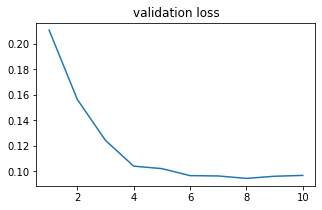

In [56]:
plt.figure(figsize=(5, 3))
plt.plot(np.arange(1, epochs+1), lossv)
plt.title('validation loss')
plt.savefig("loss.png", dpi=300)

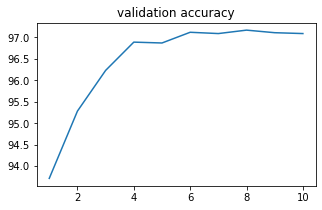

In [57]:
plt.figure(figsize=(5, 3))
plt.plot(np.arange(1, epochs+1), accv)
plt.title('validation accuracy')
plt.savefig("accuracy.png", dpi=300)